In [1]:
#importing packages

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


In [2]:
# importing csv from earlier scraping

df = pd.read_csv("nba_2122_stats.csv")
df = df.rename(columns={'22':'salary_2122', 'Tm_x':'Team', 'USG%':'USG', 'TS%':'TS'})

In [3]:
df.columns

Index(['Player', 'Pos', 'Age', 'Team', 'G', 'MP', 'PER', 'TS', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'salary_2122'],
      dtype='object')

In [4]:
# creating minutes per game and simplified salary variables to use in analysis
df['MPG'] = (df['MP']/df['G'])
df['sal'] = (df['salary_2122']/1000000)
df.head()

,Player,Pos,Age,Team,G,MP,PER,TS,3PAr,FTr,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,salary_2122,MPG,sal
0,Steven Adams,C,28.0,MEM,59.0,1557.0,17.6,0.560,0.000,0.537,...,2.1,5.0,0.155,1.1,0.6,1.7,1.5,17073171,26.389831,17.073171
1,Bam Adebayo,C,24.0,MIA,38.0,1269.0,21.1,0.582,0.010,0.444,...,2.4,4.6,0.174,1.4,2.1,3.5,1.8,28103550,33.394737,28.103550
2,Santi Aldama,PF,21.0,MEM,27.0,277.0,8.5,0.425,0.402,0.206,...,0.2,0.2,0.027,-4.6,-2.0,-6.6,-0.3,1994520,10.259259,1.994520
3,LaMarcus Aldridge,C,36.0,BRK,43.0,980.0,20.7,0.607,0.102,0.222,...,0.9,3.0,0.149,1.8,-0.8,1.0,0.7,2641691,22.790698,2.641691
4,Nickeil Alexander-Walker,SG,23.0,TOT,52.0,1322.0,10.7,0.473,0.483,0.153,...,0.9,-0.1,-0.004,-1.6,-1.5,-3.1,-0.4,3261480,25.423077,3.261480


In [137]:
# creating simplified dataframe for analysis
pervorp = df[['Player', 'Pos', 'Age', 'Team', 'G', 'MP', 'MPG', 'PER', 'TS', 'USG', 'VORP', 'OBPM', 'sal','salary_2122']]
pervorp[:10]

,Player,Pos,Age,Team,G,MP,MPG,PER,TS,USG,VORP,OBPM,sal,salary_2122
0,Steven Adams,C,28.0,MEM,59.0,1557.0,26.389831,17.6,0.560,12.3,1.5,1.1,17.073171,17073171
1,Bam Adebayo,C,24.0,MIA,38.0,1269.0,33.394737,21.1,0.582,25.2,1.8,1.4,28.103550,28103550
2,Santi Aldama,PF,21.0,MEM,27.0,277.0,10.259259,8.5,0.425,17.1,-0.3,-4.6,1.994520,1994520
3,LaMarcus Aldridge,C,36.0,BRK,43.0,980.0,22.790698,20.7,0.607,23.1,0.7,1.8,2.641691,2641691
4,Nickeil Alexander-Walker,SG,23.0,TOT,52.0,1322.0,25.423077,10.7,0.473,24.9,-0.4,-1.6,3.261480,3261480
5,Nickeil Alexander-Walker,SG,23.0,NOP,50.0,1317.0,26.340000,10.8,0.474,24.9,-0.3,-1.5,3.261480,3261480
6,Nickeil Alexander-Walker,SG,23.0,UTA,2.0,5.0,2.500000,-5.5,0.000,8.7,0.0,-11.4,3.261480,3261480
7,Grayson Allen,SG,26.0,MIL,52.0,1435.0,27.596154,12.9,0.585,16.0,0.8,0.5,4.054695,4054695
8,Jarrett Allen,C,23.0,CLE,54.0,1764.0,32.666667,23.2,0.696,18.1,2.7,2.8,20.000000,20000000
9,Kyle Anderson,PF,28.0,MEM,50.0,1088.0,21.760000,14.2,0.496,16.2,0.7,-0.9,9.937150,9937150


<AxesSubplot:>

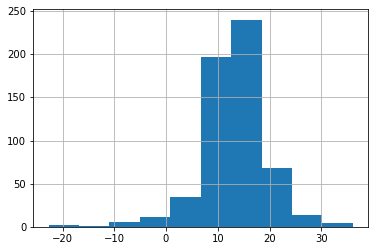

In [7]:
pervorp.PER.hist()

<AxesSubplot:>

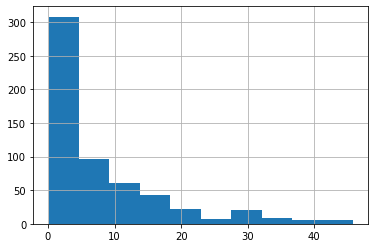

In [8]:
pervorp.sal.hist()

<AxesSubplot:>

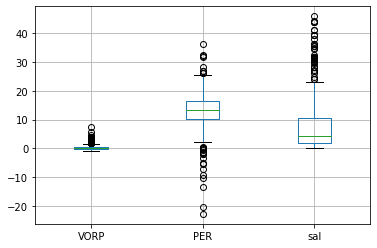

In [9]:
pervorp.boxplot(column = ['VORP', 'PER', 'sal'])

In [152]:
mapcorr = pervorp[['VORP', 'PER', 'MPG', 'USG','Age', 'TS','OBPM','sal']].corr()
mapcorr

,VORP,PER,MPG,USG,Age,TS,OBPM,sal
VORP,1.000000,0.595726,0.569074,0.422492,0.111611,0.272917,0.629302,0.594462
PER,0.595726,1.000000,0.522972,0.470219,0.074190,0.711036,0.899752,0.469830
MPG,0.569074,0.522972,1.000000,0.449352,0.135691,0.304606,0.636963,0.620250
USG,0.422492,0.470219,0.449352,1.000000,-0.040723,0.072597,0.407547,0.501519
Age,0.111611,0.074190,0.135691,-0.040723,1.000000,0.061905,0.117673,0.328719
TS,0.272917,0.711036,0.304606,0.072597,0.061905,1.000000,0.684489,0.185920
OBPM,0.629302,0.899752,0.636963,0.407547,0.117673,0.684489,1.000000,0.537779
sal,0.594462,0.469830,0.620250,0.501519,0.328719,0.185920,0.537779,1.000000


<AxesSubplot:>

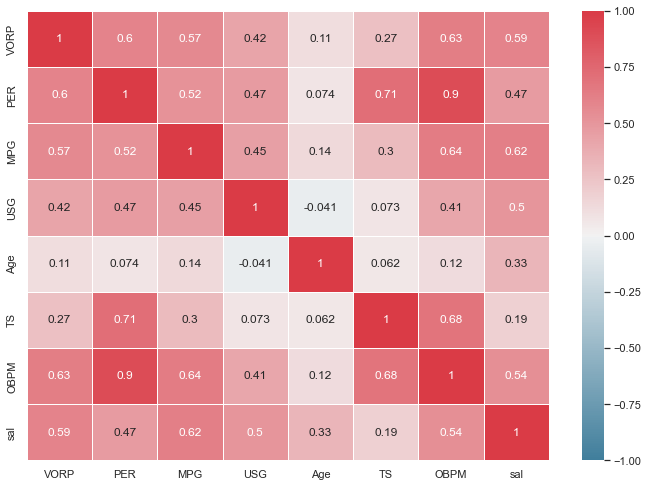

In [159]:
cmap = sns.diverging_palette(230, 10, as_cmap=True)
hm2 = sns.heatmap(mapcorr, cmap=cmap, vmax=1, vmin=-1, linewidths=.5,
           annot=True)
hm2

In [161]:
figure2 = hm2.get_figure()    
figure2.savefig('hm2.png', dpi=200)

In [138]:
pervorp2 = pervorp[pervorp.MPG >= 8]
pervorp2 = pervorp2[pervorp2.MPG <= 25]
pervorp2.describe()

,Age,G,MP,MPG,PER,TS,USG,VORP,OBPM,sal,salary_2122
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,3.100000e+02
mean,26.635484,34.535484,603.100000,16.825497,12.701935,0.545103,16.920645,0.104516,-1.712258,4.623374,4.623374e+06
std,4.477130,16.340542,364.218843,4.470265,4.439044,0.082170,3.965779,0.424164,2.045876,4.591205,4.591205e+06
min,19.000000,1.000000,9.000000,8.000000,-3.400000,0.183000,5.100000,-0.700000,-9.900000,0.085578,8.557800e+04
25%,23.000000,24.000000,319.250000,13.546528,9.800000,0.498250,14.225000,-0.100000,-3.000000,1.784280,1.784280e+06
50%,26.000000,37.500000,581.500000,16.538685,12.250000,0.541000,17.000000,0.000000,-1.650000,2.641691,2.641691e+06
75%,30.000000,48.000000,893.500000,20.354390,15.175000,0.586500,19.600000,0.300000,-0.300000,5.242231,5.242231e+06
max,38.000000,62.000000,1428.000000,25.000000,28.200000,0.852000,32.600000,2.300000,5.100000,32.405817,3.240582e+07


In [150]:
mapcorr2 = pervorp2[['VORP', 'PER', 'MPG', 'USG','Age', 'TS','OBPM','sal']].corr()
mapcorr2

,VORP,PER,MPG,USG,Age,TS,OBPM,sal
VORP,1.000000,0.624787,0.310219,0.078285,0.125784,0.462681,0.685176,0.242973
PER,0.624787,1.000000,0.153538,0.386821,0.038791,0.723607,0.816585,0.201473
MPG,0.310219,0.153538,1.000000,0.046609,0.145971,0.148760,0.295898,0.296030
USG,0.078285,0.386821,0.046609,1.000000,-0.115972,-0.032686,0.246813,0.130232
Age,0.125784,0.038791,0.145971,-0.115972,1.000000,0.023722,0.106777,0.330601
TS,0.462681,0.723607,0.148760,-0.032686,0.023722,1.000000,0.707804,0.116747
OBPM,0.685176,0.816585,0.295898,0.246813,0.106777,0.707804,1.000000,0.322690
sal,0.242973,0.201473,0.296030,0.130232,0.330601,0.116747,0.322690,1.000000


<AxesSubplot:>

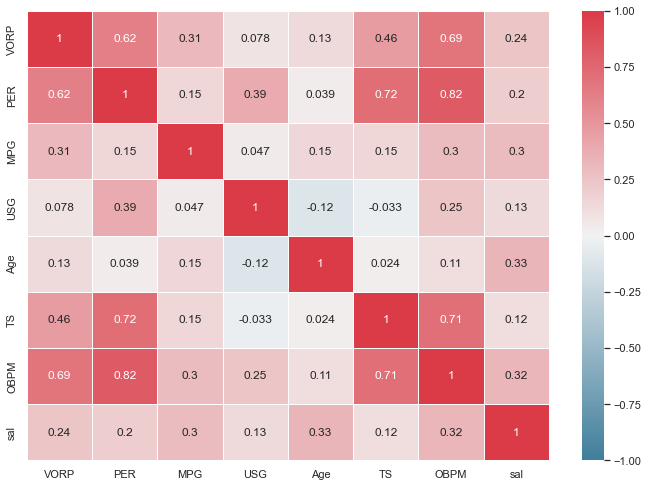

In [156]:
hm1 = sns.heatmap(mapcorr2, cmap=cmap, vmax=1, vmin=-1, linewidths=1,
           annot=True)

hm1

In [158]:
figure = hm1.get_figure()    
figure.savefig('hm1.png', dpi=200)

In [146]:
pervorp2[['sal','VORP','PER','Age','OBPM']].corr()


,sal,VORP,PER,Age,OBPM
sal,1.000000,0.242973,0.201473,0.330601,0.322690
VORP,0.242973,1.000000,0.624787,0.125784,0.685176
PER,0.201473,0.624787,1.000000,0.038791,0.816585
Age,0.330601,0.125784,0.038791,1.000000,0.106777
OBPM,0.322690,0.685176,0.816585,0.106777,1.000000


<AxesSubplot:>

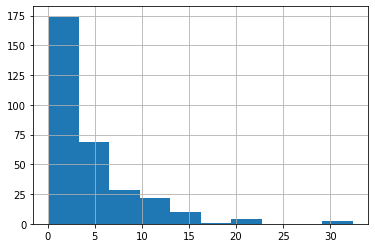

In [17]:
pervorp2.sal.hist()

<AxesSubplot:>

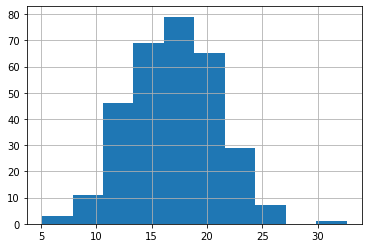

In [18]:
pervorp2.USG.hist()

<AxesSubplot:xlabel='sal', ylabel='MPG'>

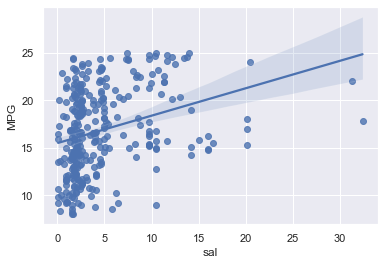

In [19]:
sns.set_theme(color_codes=True)
sns.regplot(x='sal', y='MPG', data=pervorp2)

In [25]:
mapcorr3 = df[['Age', 'MPG', 'PER', 'TS', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'sal']].corr()
pervorp2.columns

Index(['Player', 'Pos', 'Age', 'Team', 'G', 'MP', 'MPG', 'PER', 'TS', 'USG',
       'VORP', 'OBPM', 'sal'],
      dtype='object')

In [30]:
mapcorr4 = pervorp2[['Age', 'MPG', 'PER', 'TS', 'USG',
       'VORP', 'OBPM', 'sal']].corr()

<AxesSubplot:>

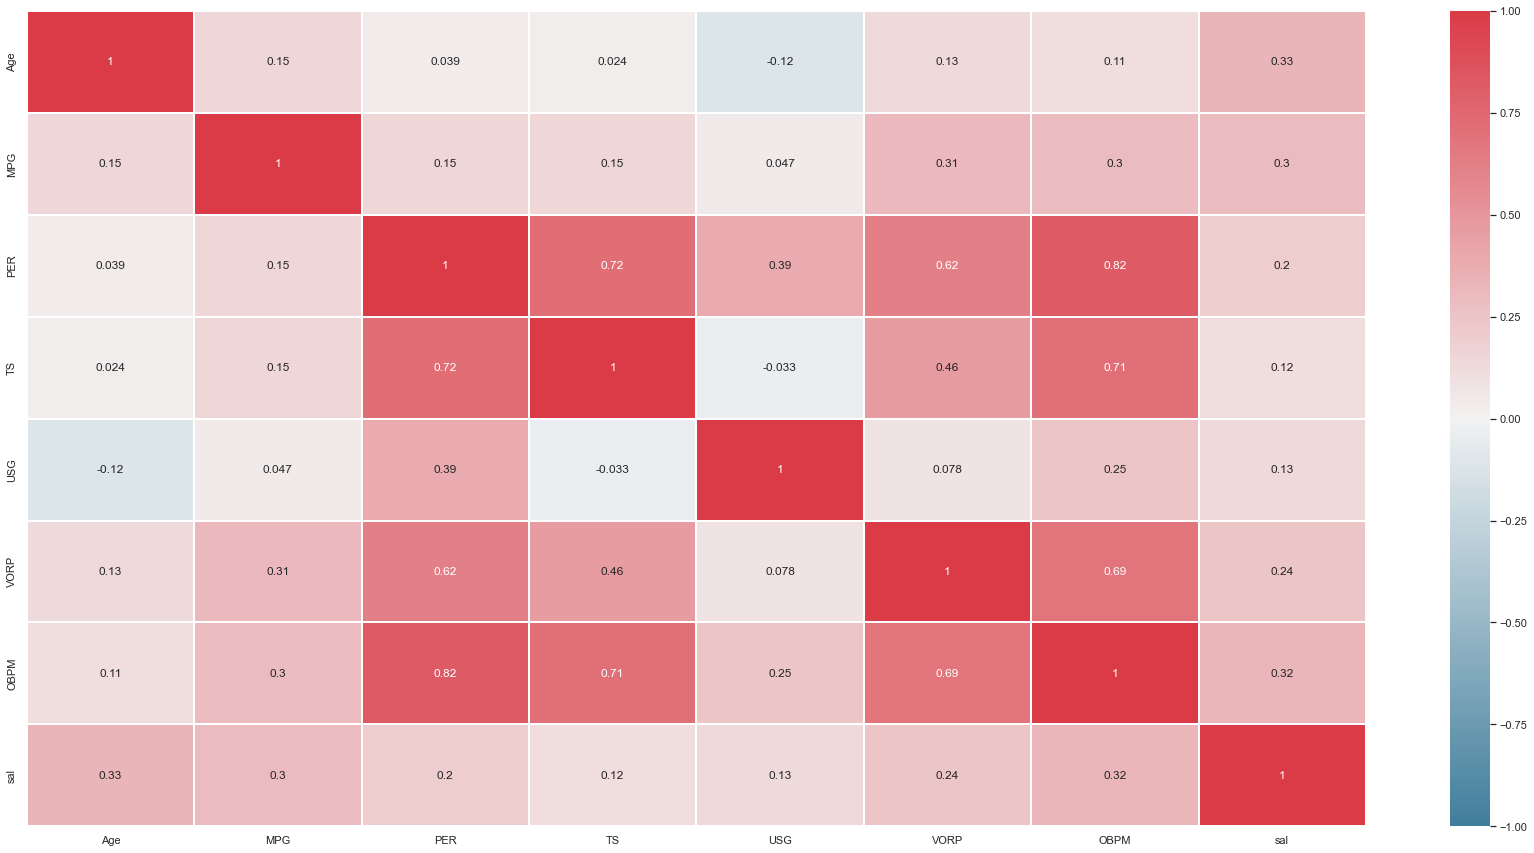

In [29]:
plt.figure(figsize=(30, 15))
sns.heatmap(mapcorr4, cmap=cmap, vmax=1, vmin=-1, linewidths=0.1,
           annot=True)

<AxesSubplot:>

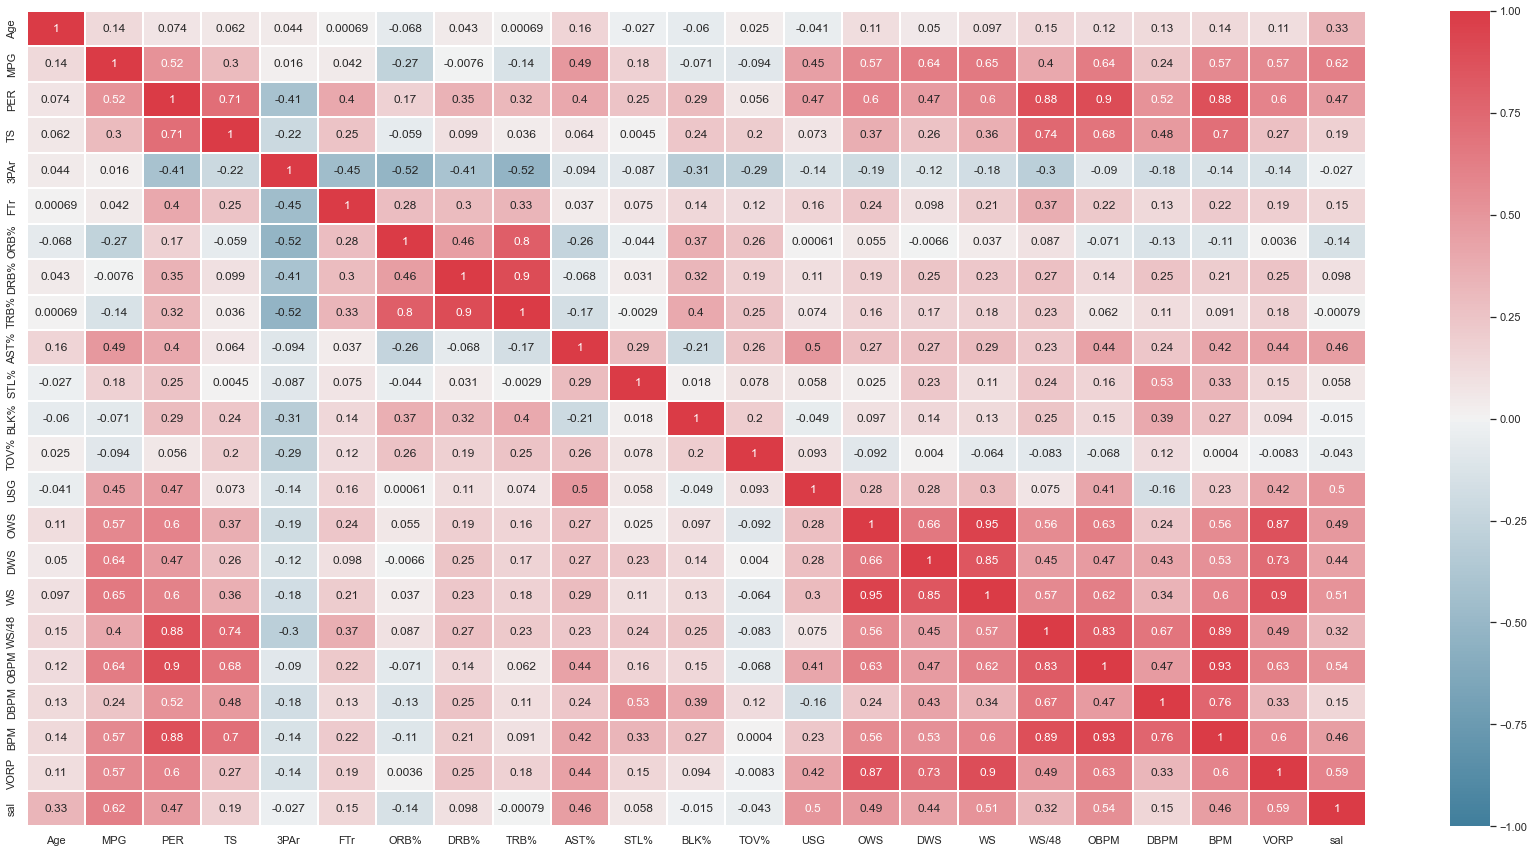

In [21]:
plt.figure(figsize=(30, 15))
sns.heatmap(mapcorr3, cmap=cmap, vmax=1, vmin=-1, linewidths=0.1,
           annot=True)

In [142]:
reg1 = smf.ols(formula = 'sal ~ MPG + PER + VORP + USG + Age + OBPM', data = pervorp).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                    sal   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     131.0
Date:                Fri, 04 Mar 2022   Prob (F-statistic):          7.91e-104
Time:                        12:47:40   Log-Likelihood:                -1848.5
No. Observations:                 577   AIC:                             3711.
Df Residuals:                     570   BIC:                             3742.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.7921      2.445     -7.277      0.0

In [155]:
reg2 = smf.ols(formula = 'sal ~ MPG + PER + VORP + USG + OBPM + Age', data = pervorp2).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                    sal   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     16.18
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           3.74e-16
Time:                        15:58:56   Log-Likelihood:                -868.78
No. Observations:                 310   AIC:                             1752.
Df Residuals:                     303   BIC:                             1778.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.2665      2.472     -2.130      0.0

In [145]:
print(reg2.params)

Intercept   -5.266514
MPG          0.171312
PER         -0.189684
VORP         0.274808
USG          0.163460
OBPM         0.762682
Age          0.297655
dtype: float64


<AxesSubplot:xlabel='sal', ylabel='MPG'>

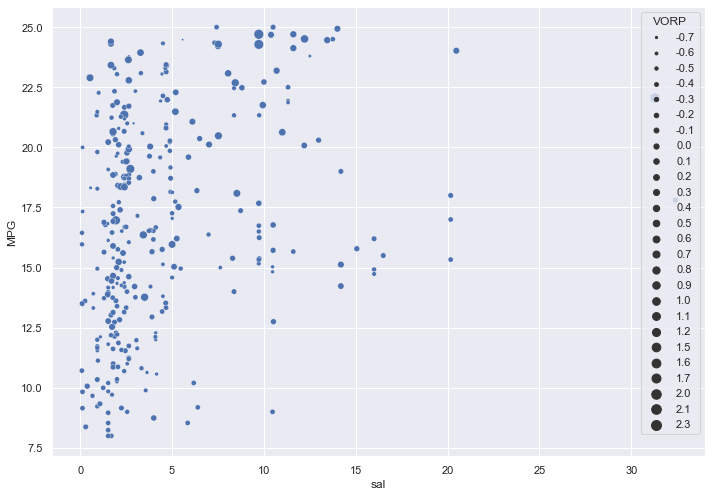

In [132]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(
    data=pervorp2, x="sal", y="MPG", size="VORP",
    sizes=(5, 100), hue_norm=(0, 7), legend="full")


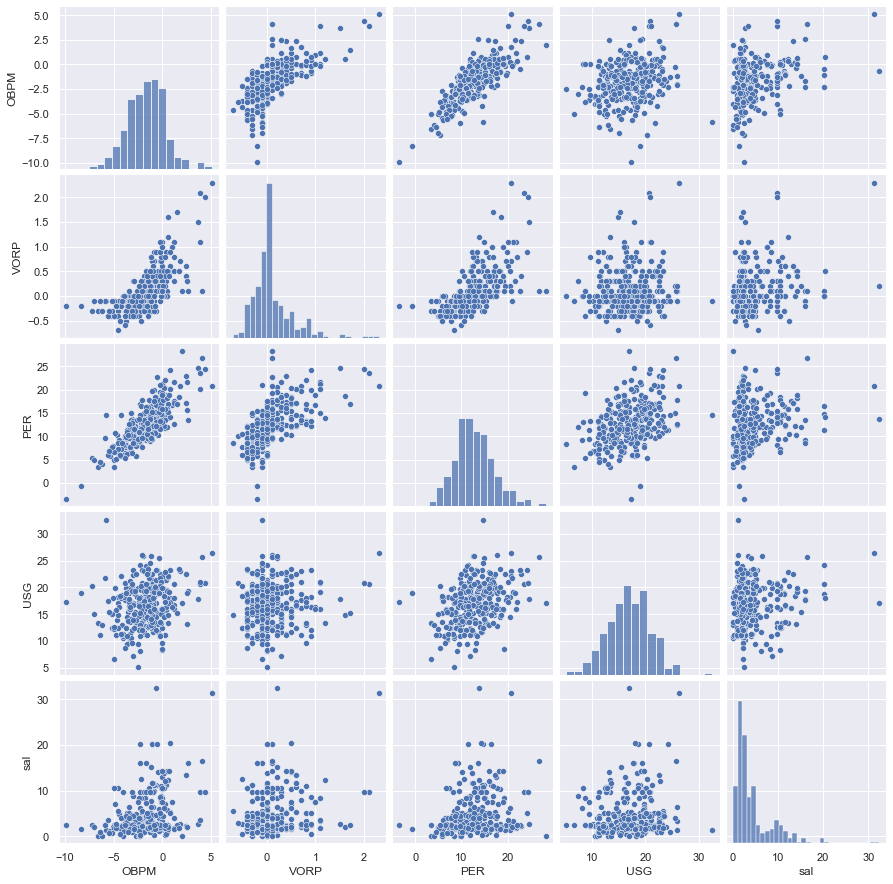

In [129]:
sns.pairplot(pervorp2[['OBPM', 'VORP', 'PER', 'USG', 'sal']])

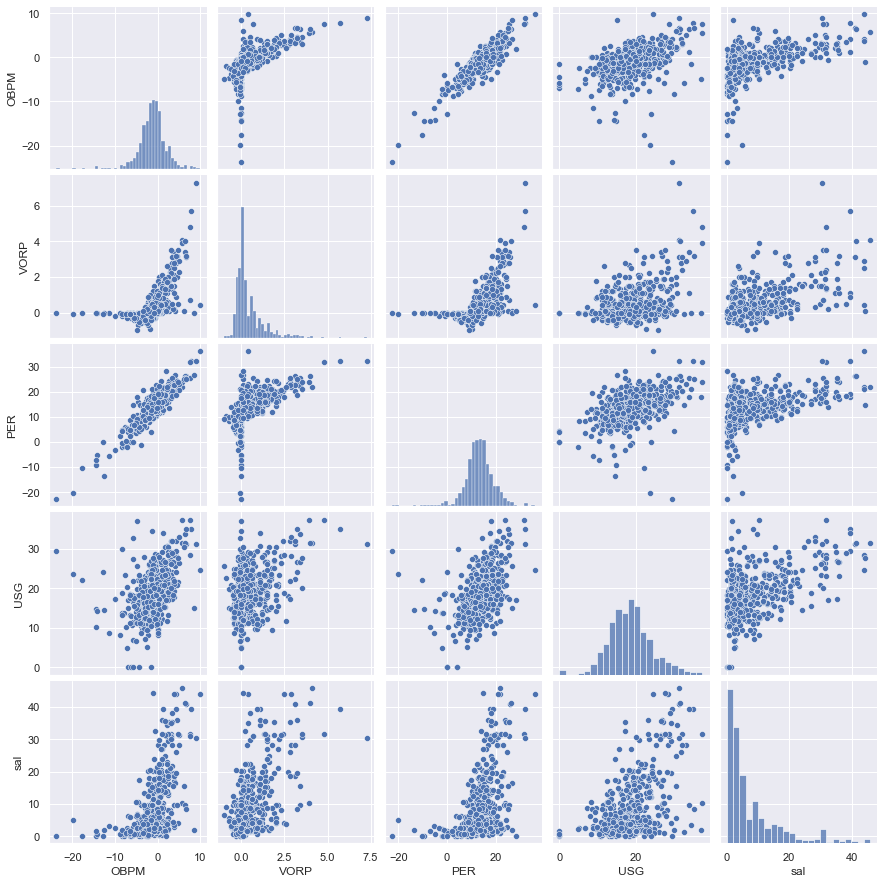

In [130]:
sns.pairplot(pervorp[['OBPM', 'VORP', 'PER', 'USG', 'sal']])